In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced statistical visualizations

# Load the dataset from the specified path
df = pd.read_csv("D:\\archive\\UpdatedResumeDataSet.csv")  # Ensure the file path is correct

# The dataset likely contains resumes with categorized labels; further analysis can be done on text data

In [2]:
# Display the first 5 rows of the dataset
print("\nFirst 5 Rows of the Dataset:\n")
print(df.head())

# Display a summary of the dataset, including column names, non-null counts, and data types
print("\nDataset Information:\n")
df.info()

# Generate descriptive statistics for numerical columns
print("\nStatistical Summary of the Dataset:\n")
print(df.describe())

# Display the last 5 rows of the dataset
print("\nLast 5 Rows of the Dataset:\n")
print(df.tail())


First 5 Rows of the Dataset:

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB

Statistical Summary of the Dataset:

              Category                                             Resume
count              962                                                962
unique              25                                       

In [3]:
# Display the count of unique values in the 'Category' column
print("\nCount of Resumes in Each Category:\n")
print(df.Category.value_counts())


Count of Resumes in Each Category:

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64



Visualizing the distribution of resume categories...



C:\Users\HP\AppData\Local\Temp\ipykernel_16328\74920617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], order=df['Category'].value_counts().index, palette="viridis")


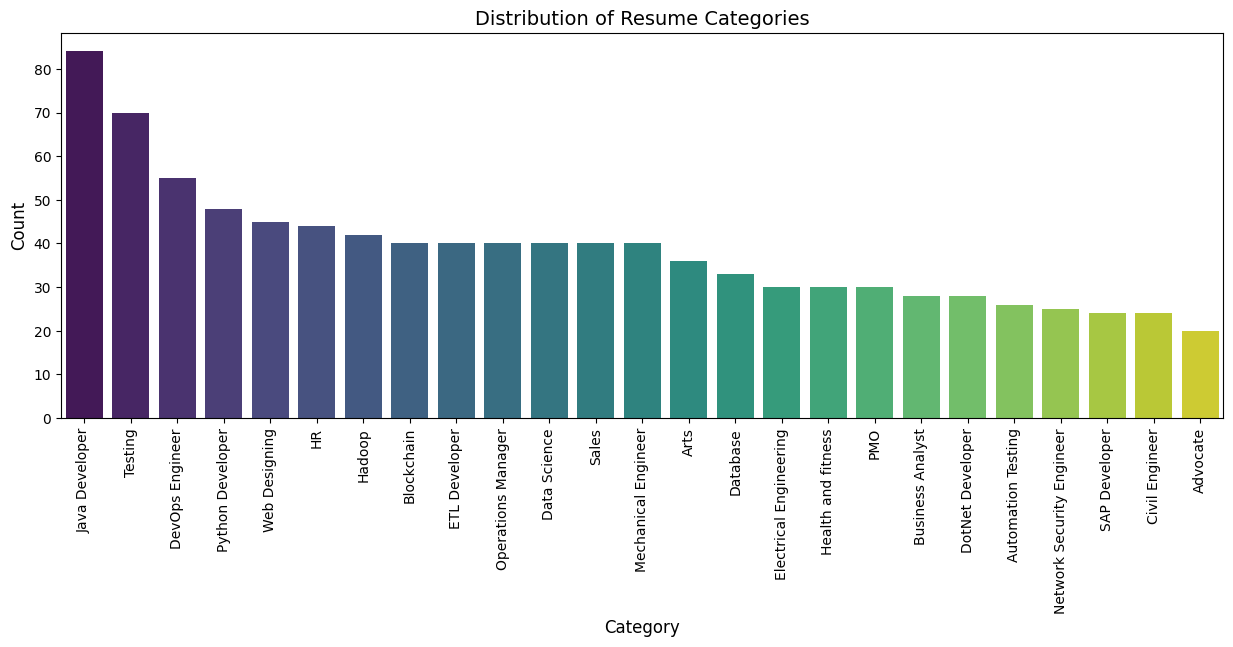

In [4]:
plt.figure(figsize=(15, 5))
print("\nVisualizing the distribution of resume categories...\n")
sns.countplot(x=df['Category'], order=df['Category'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Resume Categories", fontsize=14)
plt.show()

In [5]:
# Count occurrences of each category
counts = df['Category'].value_counts()

# Get the number of unique categories
num_labels = df['Category'].nunique()

# Get the actual unique category labels
labels = df['Category'].unique()

# Print the results
print("\nTotal Unique Categories:", num_labels)
print("\nList of Unique Categories:\n", labels)


Total Unique Categories: 25

List of Unique Categories:
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']



Visualizing category distribution as a pie chart...



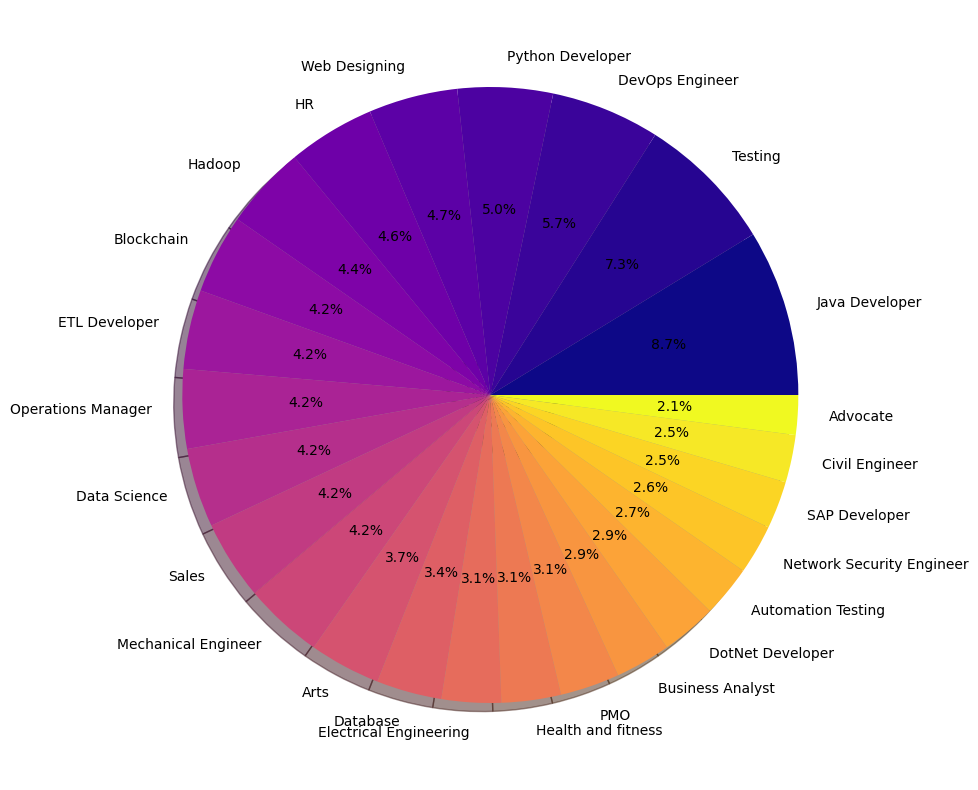

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences of each category
counts = df['Category'].value_counts()

# Get unique category labels (must match the count values)
labels = counts.index  # Correct way to extract labels

# Set figure size
plt.figure(figsize=(15, 10))

# Generate colors dynamically based on the number of categories
colors = plt.cm.plasma(np.linspace(0, 1, len(labels)))  # Ensures proper color matching

# Plot the pie chart
print("\nVisualizing category distribution as a pie chart...\n")
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)

# Show the chart
plt.show()

In [7]:
# Import necessary library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with stop words removal
tfidf = TfidfVectorizer(stop_words='english', strip_accents='unicode')

# Ensure there are no missing values in the 'Resume' column
df['Resume'].fillna('', inplace=True)  # Replacing NaN values with an empty string

# Fit the vectorizer on the text data and transform it into numerical features
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

# Print the shape of the transformed data
print("\nTF-IDF Transformation Complete!")
print(f"Transformed Matrix Shape: {requiredText.shape}")  # (rows, features)

C:\Users\HP\AppData\Local\Temp\ipykernel_16328\2124369177.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resume'].fillna('', inplace=True)  # Replacing NaN values with an empty string



TF-IDF Transformation Complete!
Transformed Matrix Shape: (962, 7383)


In [8]:
# Check the type of requiredText
print(f"\nType of requiredText: {type(requiredText)}")

# Print the shape (rows, columns) of the transformed matrix
print(f"TF-IDF Matrix Shape: {requiredText.shape}")  # (Number of resumes, Number of features)

# Print a small portion of the sparse matrix (first 5 rows)
print("\nFirst 5 Rows of TF-IDF Matrix (Sparse Format):\n")
print(requiredText[:5])  # Prints the sparse matrix representation



Type of requiredText: <class 'scipy.sparse._csr.csr_matrix'>
TF-IDF Matrix Shape: (962, 7383)

First 5 Rows of TF-IDF Matrix (Sparse Format):

  (0, 118)	0.06309716829673218
  (0, 270)	0.04529282661236908
  (0, 303)	0.03043213597898398
  (0, 324)	0.03007033236588397
  (0, 353)	0.04529282661236908
  (0, 382)	0.028634626250471872
  (0, 521)	0.1373343273795929
  (0, 524)	0.0767602348740478
  (0, 527)	0.1530652110646241
  (0, 532)	0.020496250528059035
  (0, 539)	0.02560543932796158
  (0, 550)	0.04529282661236908
  (0, 553)	0.03643934432415505
  (0, 664)	0.04529282661236908
  (0, 690)	0.07917736197354959
  (0, 692)	0.028350881471600614
  (0, 693)	0.0746896903086583
  (0, 694)	0.0661849292348697
  (0, 699)	0.10473184517253178
  (0, 717)	0.036877937060708056
  (0, 754)	0.026848701095284765
  (0, 757)	0.03425247386080087
  (0, 849)	0.015137610625985282
  (0, 861)	0.07917736197354959
  (0, 896)	0.02347674488340348
  :	:
  (3, 7357)	0.059035294761717726
  (4, 521)	0.10333984621234758
  (4, 1448

In [9]:
import re

# Function to clean resume text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\n', ' ', text)  # Replace newlines with spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to resumes
print("\nCleaning resumes... This may take some time.\n")
df["Cleaned_Resume"] = df["Resume"].fillna('').apply(clean_text)  # Ensure no NaN values

# Display a cleaned sample
print("\nSample of Cleaned Resumes:\n")
print(df[["Category", "Cleaned_Resume"]].head())


Cleaning resumes... This may take some time.


Sample of Cleaned Resumes:

       Category                                     Cleaned_Resume
0  Data Science  skills programming languages python pandas num...
1  Data Science  education details may to may be uitrgpv data s...
2  Data Science  areas of interest deep learning control system...
3  Data Science  skills r python sap hana tableau sap hana sql ...
4  Data Science  education details mca ymcaust faridabad haryan...


In [10]:
import spacy
from spacy.matcher import PhraseMatcher

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Define a skills list (can be expanded)
skills_list = ["python", "sql", "machine learning", "deep learning", "nlp", "tableau",
               "pandas", "numpy", "tensorflow", "pytorch", "big data", "java", "r", "c++",
               "power bi", "excel", "hadoop", "spark", "cloud computing", "git"]

# Initialize PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
patterns = [nlp(skill.lower()) for skill in skills_list]  # Convert skills to spaCy tokens
matcher.add("SKILLS", patterns)

# Function to extract skills from resume text
def extract_skills(text):
    doc = nlp(text.lower())  # Convert to lowercase for consistency
    matches = matcher(doc)  # Find matches using PhraseMatcher
    extracted_skills = {doc[start:end].text for match_id, start, end in matches}  # Extract matched skills
    return ", ".join(extracted_skills)

# Apply skill extraction
print("\nExtracting skills from resumes... This may take some time.\n")
df["Extracted_Skills"] = df["Cleaned_Resume"].apply(extract_skills)

# Display extracted skills
print("\nSample Extracted Skills:\n")
print(df[["Category", "Extracted_Skills"]].head())


Extracting skills from resumes... This may take some time.


Sample Extracted Skills:

       Category                                   Extracted_Skills
0  Data Science  sql, python, java, tableau, git, machine learn...
1  Data Science                           python, machine learning
2  Data Science  excel, deep learning, python, sql, java, machi...
3  Data Science  r, sql, python, deep learning, tableau, machin...
4  Data Science                                       python, java


C:\Users\HP\AppData\Local\Temp\ipykernel_16328\3573713042.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].fillna("Unknown", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16328\3573713042.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="viridis")


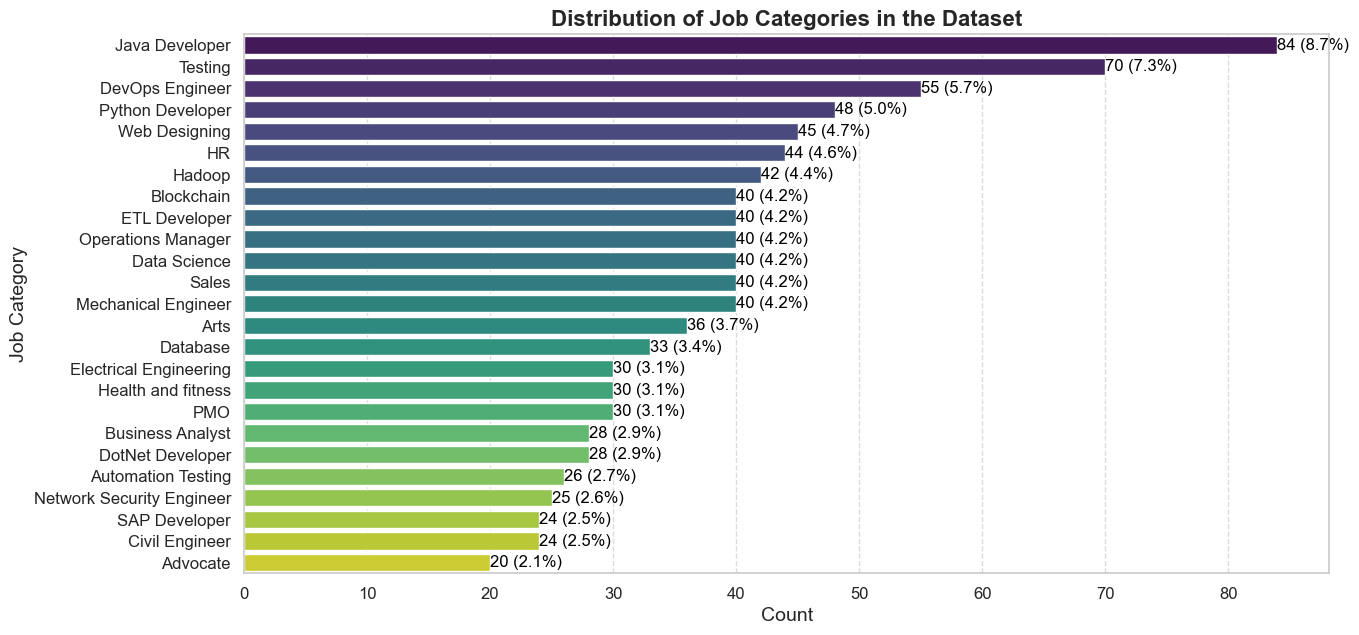

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Handle missing values (if any)
df["Category"].fillna("Unknown", inplace=True)

# Compute total resumes for percentage calculation
total_resumes = len(df)

# Create a figure
plt.figure(figsize=(14, 7))

# Generate countplot
ax = sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="viridis")

# Add value labels with percentages
for p in ax.patches:
    count = int(p.get_width())  # Get count value
    percentage = f'{(count / total_resumes) * 100:.1f}%'  # Calculate percentage
    ax.annotate(f'{count} ({percentage})', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=12, color='black')

# Customize plot labels
plt.xlabel("Count", fontsize=14)
plt.ylabel("Job Category", fontsize=14)
plt.title("Distribution of Job Categories in the Dataset", fontsize=16, fontweight='bold')

# Improve layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16328\3662086018.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Resume"].fillna("", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16328\3662086018.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="TF-IDF Score", y="Skill", data=skills_df, palette="magma")


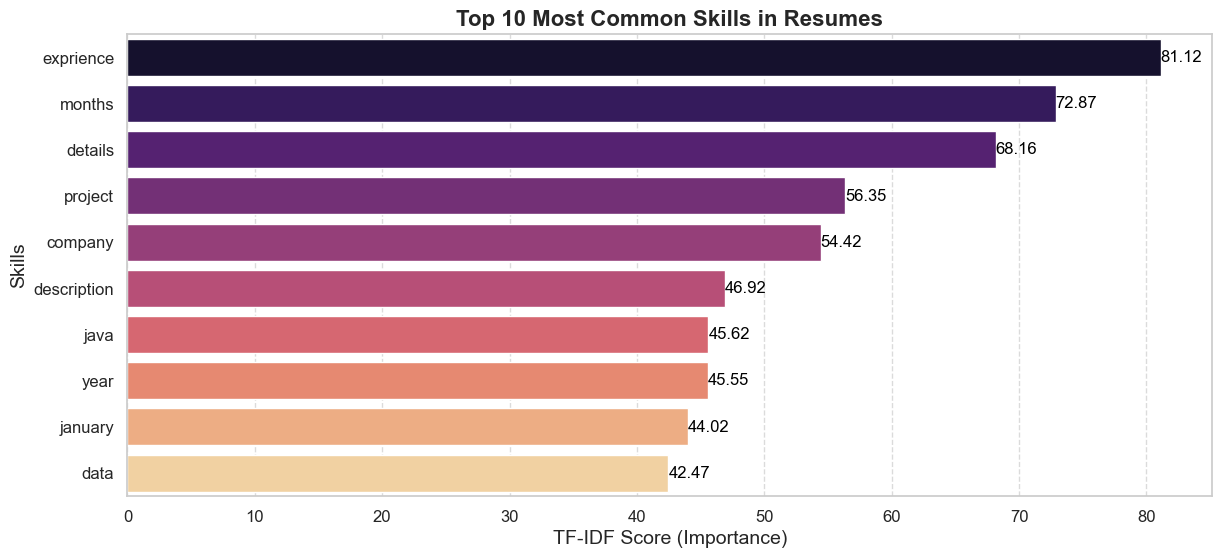

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values in 'Resume' column
df["Resume"].fillna("", inplace=True)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform resume text
tfidf_matrix = vectorizer.fit_transform(df["Resume"])

# Extract top skills (feature names)
top_skills = vectorizer.get_feature_names_out()

# Compute skill importance scores
word_freq = dict(zip(top_skills, tfidf_matrix.sum(axis=0).tolist()[0]))

# Get top 10 most important skills
top_10_skills = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_10_skills, columns=["Skill", "TF-IDF Score"])

# Set plot style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="TF-IDF Score", y="Skill", data=skills_df, palette="magma")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=12, color='black')

# Customize labels and title
plt.xlabel("TF-IDF Score (Importance)", fontsize=14)
plt.ylabel("Skills", fontsize=14)
plt.title("Top 10 Most Common Skills in Resumes", fontsize=16, fontweight='bold')

# Improve layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Handle missing values in 'Resume' column
df["Resume"].fillna("", inplace=True)

# Sample job description
job_description = """
Looking for a Data Scientist with expertise in Python, Machine Learning, Deep Learning, SQL, and Data Analysis.
Experience with TensorFlow, Pandas, and NLP is a plus.
"""

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fix: Use pd.concat() instead of append()
tfidf_matrix = vectorizer.fit_transform(pd.concat([df["Resume"], pd.Series(job_description)], ignore_index=True))

# Compute cosine similarity between job description and resumes
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Add similarity scores to DataFrame
df["Similarity_Score"] = cosine_similarities

# Rank resumes by similarity
df_ranked = df.sort_values(by="Similarity_Score", ascending=False)[["Category", "Resume", "Similarity_Score"]].head(10)

# Save to Excel
df_ranked.to_excel("Ranked_Resumes.xlsx", index=False)

# Display ranked resumes
print("\n🔍 **Top 10 Ranked Resumes Based on Job Description:**\n")
print(df_ranked[["Category", "Similarity_Score"]])

print("\n✅ **Top 10 ranked resumes saved as 'Ranked_Resumes.xlsx'**")


C:\Users\HP\AppData\Local\Temp\ipykernel_16328\3775713282.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Resume"].fillna("", inplace=True)



🔍 **Top 10 Ranked Resumes Based on Job Description:**

        Category  Similarity_Score
27  Data Science          0.579239
7   Data Science          0.579239
37  Data Science          0.579239
17  Data Science          0.579239
18  Data Science          0.530256
8   Data Science          0.530256
38  Data Science          0.530256
28  Data Science          0.530256
6   Data Science          0.400261
36  Data Science          0.400261

✅ **Top 10 ranked resumes saved as 'Ranked_Resumes.xlsx'**
